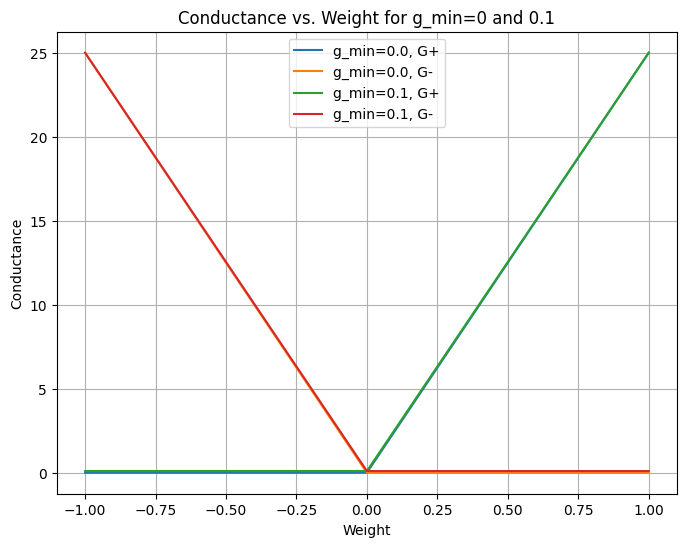

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convert_to_conductances(weights, g_min, g_max):
    abs_max = np.abs(weights).max()
    scale_ratio = (g_max - g_min) / max(abs_max, 1e-6)
    scaled_weights = weights * scale_ratio

    conductances = [
        np.clip(scaled_weights, 0.0, g_max) + g_min,
        np.clip(-scaled_weights, 0.0, g_max) + g_min,
    ]
    return conductances

# Data
weights = np.linspace(-1, 1, 500)
g_max = 25.0

# Convert
g_min_0_conductances = convert_to_conductances(weights, g_min=0.0, g_max=g_max)
g_min_01_conductances = convert_to_conductances(weights, g_min=0.1, g_max=g_max)

g_relative_0 = (g_min_01_conductances[0] - 0.1) / (g_max - 0.1)
g_relative_1 = (g_min_01_conductances[1] - 0.1) / (g_max - 0.1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(weights, g_min_0_conductances[0], label='g_min=0.0, G+')
plt.plot(weights, g_min_0_conductances[1], label='g_min=0.0, G-')
plt.plot(weights, g_min_01_conductances[0], label='g_min=0.1, G+')
plt.plot(weights, g_min_01_conductances[1], label='g_min=0.1, G-')

plt.xlabel('Weight')
plt.ylabel('Conductance')
# plt.ylim([0,1])
plt.title('Conductance vs. Weight for g_min=0 and 0.1')
plt.legend()
plt.grid(True)
plt.show()

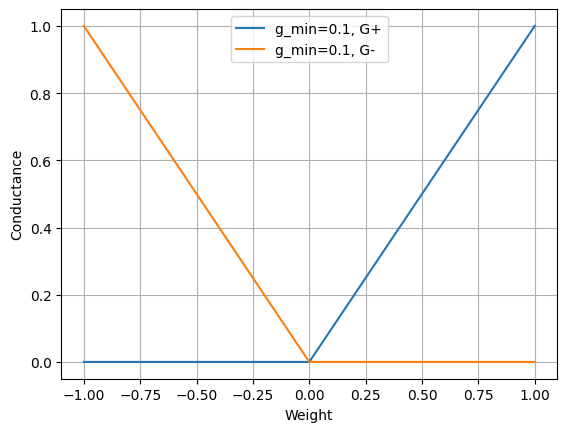

In [14]:
plt.plot(weights, g_relative_0, label='g_min=0.1, G+')
plt.plot(weights, g_relative_1, label='g_min=0.1, G-')
plt.xlabel('Weight')
plt.ylabel('Conductance')
plt.legend()
plt.grid(True)
plt.show()